<a href="https://colab.research.google.com/github/NAVENA30/MachineLearning/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()


Saving Zomato-data-.csv to Zomato-data- (1).csv


In [11]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("Zomato-data-.csv")

# Display first few rows
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [14]:
# Check for missing values
print(df.isnull().sum())

# For simplicity, let's drop rows with missing values (optional)
df = df.dropna()

# Convert categorical columns to numerical if any
df = pd.get_dummies(df)

# Split into features and online_order
y = df['online_order_Yes']
X = df.drop('online_order_Yes', axis=1)

votes                          0
approx_cost(for two people)    0
name_Aarush's Food Plaza       0
name_Addhuri Udupi Bhojana     0
name_Amma - Manae              0
                              ..
rate_4.4/5                     0
rate_4.6/5                     0
listed_in(type)_Cafes          0
listed_in(type)_Dining         0
listed_in(type)_other          0
Length: 170, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7
              precision    recall  f1-score   support

       False       0.68      0.81      0.74        16
        True       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



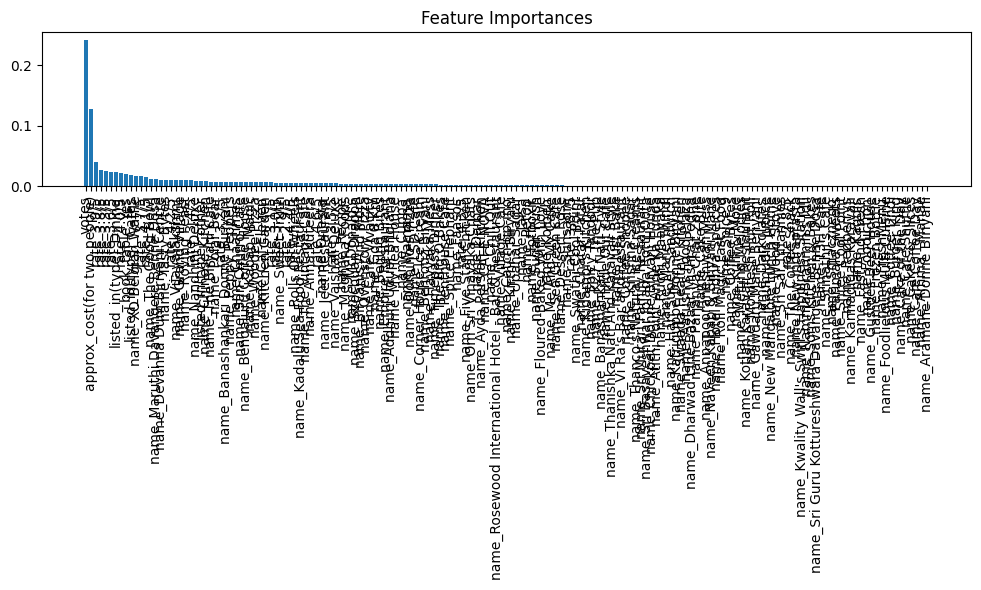

In [20]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10 , 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [21]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe(include='all'))


Shape: (148, 170)

Data Types:
 votes                          int64
approx_cost(for two people)    int64
name_Aarush's Food Plaza        bool
name_Addhuri Udupi Bhojana      bool
name_Amma - Manae               bool
                               ...  
rate_4.4/5                      bool
rate_4.6/5                      bool
listed_in(type)_Cafes           bool
listed_in(type)_Dining          bool
listed_in(type)_other           bool
Length: 170, dtype: object

Missing Values:
 votes                          0
approx_cost(for two people)    0
name_Aarush's Food Plaza       0
name_Addhuri Udupi Bhojana     0
name_Amma - Manae              0
                              ..
rate_4.4/5                     0
rate_4.6/5                     0
listed_in(type)_Cafes          0
listed_in(type)_Dining         0
listed_in(type)_other          0
Length: 170, dtype: int64

Basic Statistics:
               votes  approx_cost(for two people) name_Aarush's Food Plaza  \
count    148.000000           

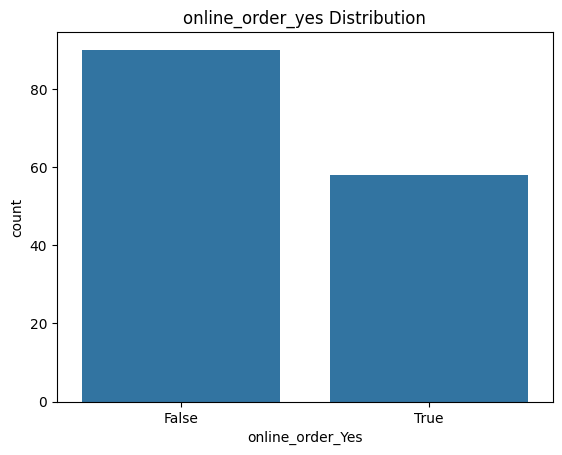

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='online_order_Yes')  # Replace with your actual target column name
plt.title("online_order_yes Distribution")
plt.show()


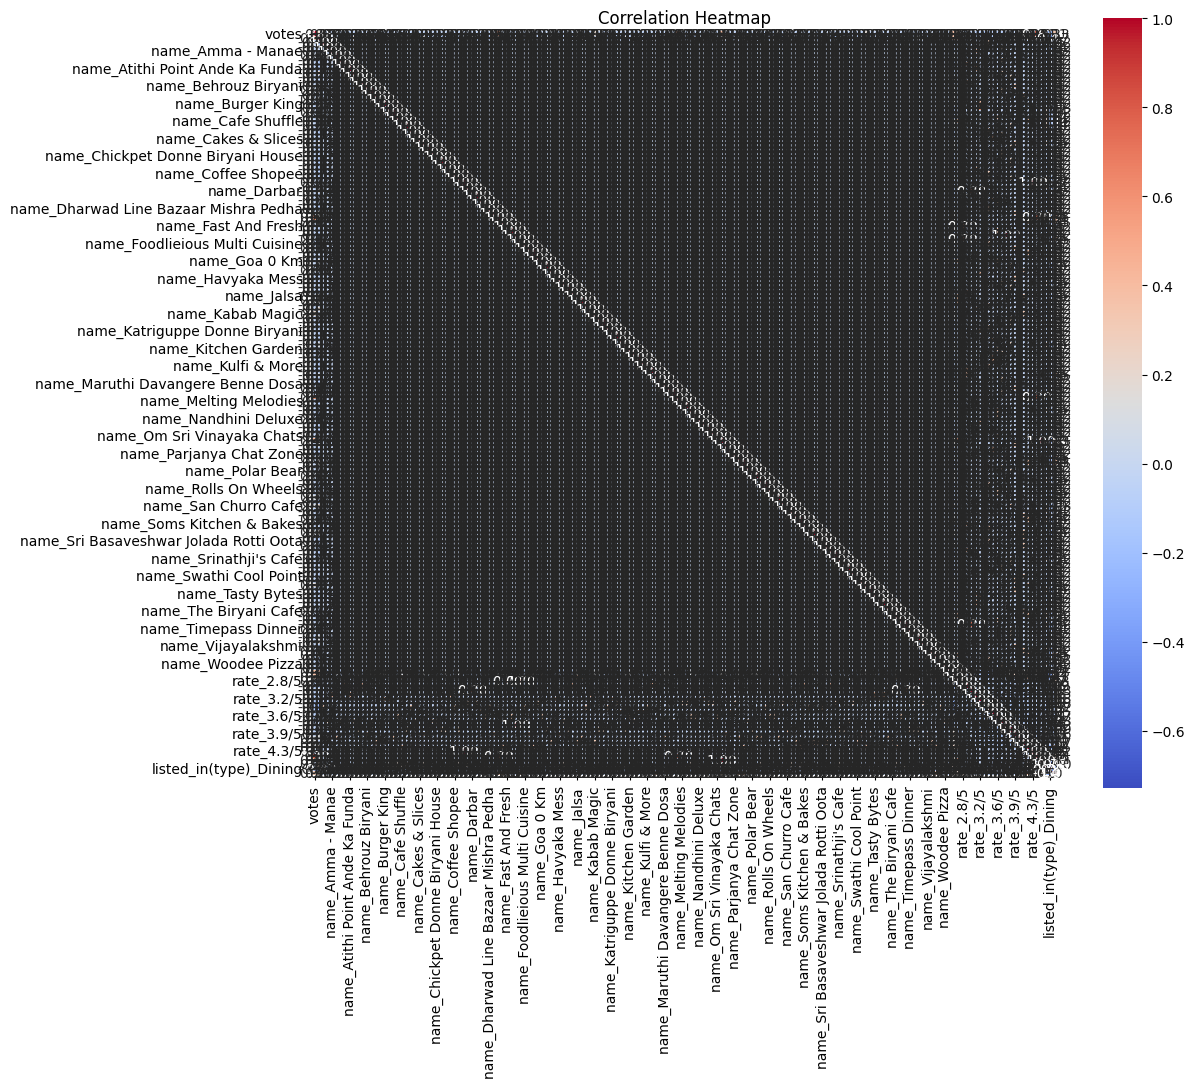

In [33]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
sns.pairplot(df, hue='online_order_yes')
plt.show()


In [23]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [25]:
#Linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.22122697170286754
R-squared: 0.11114163155097878


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.22122697170286754
R² Score: 0.11114163155097878


In [30]:
import joblib

# Save the model
joblib.dump(clf, 'my_model.pkl')

# To load later:
# model = joblib.load('my_model.pkl')


['my_model.pkl']

In [32]:
# Suppose new_data is a dictionary of feature values:
new_data = pd.DataFrame([{
    'votes': 100,  # Example value for votes
    'approx_cost(for two people)': 500,  # Example value for approx_cost(for two people)
    'name_Aarush\'s Food Plaza': False, # Example value for a dummy variable
    'name_Addhuri Udupi Bhojana': False, # Example value for a dummy variable
    'name_Amma - Manae': False, # Example value for a dummy variable
    # ... add example values for all features in X.columns
}])


# Make sure columns match:
new_data = pd.get_dummies(new_data)
new_data = new_data.reindex(columns=X.columns, fill_value=0)

prediction = clf.predict(new_data)
print("Prediction:", prediction)

Prediction: [False]
